In [45]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [49]:
sr = pd.read_csv("data/speech_reading.csv")
sm = pd.read_csv("data/speech_monologue.csv")
sr = sr.add_suffix("_reading")
sm = sm.add_suffix("_monologue")

# Clustering with LDA

In [50]:
# plot helpers
lw = 2
colors = ["navy", "turquoise", "darkorange"]
target_names = ["PD", "RD", "HC"]
labels = [1, 2, 3]

lda = LinearDiscriminantAnalysis(n_components=2)

### Clustering for reading only

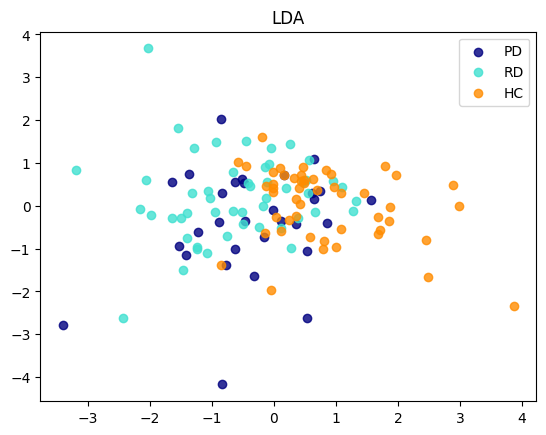

In [51]:
X = sr.drop('group_reading', axis=1)
y = sr['group_reading']

X_2comp = lda.fit(X, y).transform(X)

plt.figure()
for color, i, target_name in zip(colors, labels, target_names):
    plt.scatter(
        X_2comp[y == i, 0], X_2comp[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA")

plt.show()

### Clustering for monologue only

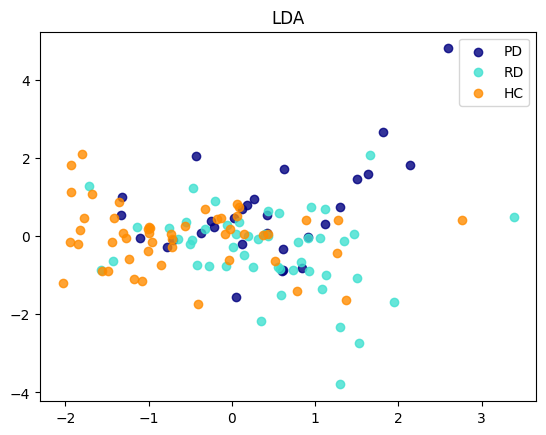

In [52]:
X = sm.drop('group_monologue', axis=1)
y = sm['group_monologue']

X_2comp = lda.fit(X, y).transform(X)

plt.figure()
for color, i, target_name in zip(colors, labels, target_names):
    plt.scatter(
        X_2comp[y == i, 0], X_2comp[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA")

plt.show()

### Clustering with LDA using monologue + reading
- we can see 3, albeit overlapping clusters, meaning that the groups can be separated by these variables but not super well

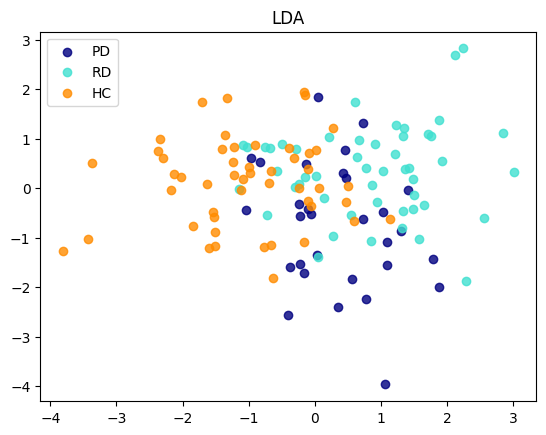

In [53]:
# Join data horizontaly
sr = sr.drop("group_reading", axis=1)
data = pd.concat([sr, sm], axis=1)
data.rename(columns = {'group_monologue':'group'}, inplace=True)

X = data.drop('group', axis = 1)
y = data['group']

X_2comp = lda.fit(X, y).transform(X)

plt.figure()
for color, i, target_name in zip(colors, labels, target_names):
    plt.scatter(
        X_2comp[y == i, 0], X_2comp[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA")

plt.show()

# Feature selection
- logistic regression with L1 regularization can remove variables with low predictive power from the dataset

## Variables sorted by their predictive power, displaying first 6
- using l1 regularization

In [81]:
num_of_variables_displayed = 6

In [84]:
# Standardize the train and test sample
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform GridSearchCV to tune best-fit LR model
param = {'C': np.linspace(10**-2, 10**2, 15)}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X_std, y)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(X_std, y)

d = np.column_stack((np.array(X.columns),abs(model.coef_[0])))
d[d[:, 1].argsort()][::-1][:num_of_variables_displayed]

array([['PauseInt_monologue', 1.4035945356522437],
       ['SpeechRate_reading', 0.5551864924243765],
       ['GapingInt_monologue', 0.4996557534144867],
       ['SpeechAcceleration_monologue', 0.4067625836033937],
       ['SpeechRate_monologue', 0.37023693511282757],
       ['UnvoicedStops_monologue', 0.34193057998156123]], dtype=object)

- without l1 regularization

In [85]:
# Standardize the train and test sample
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform GridSearchCV to tune best-fit LR model
param = {'C': np.linspace(10**-2, 10**2, 15)}

lr_model = LogisticRegression(solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X_std, y)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, solver='liblinear')
model.fit(X_std, y)

d = np.column_stack((np.array(X.columns),abs(model.coef_[0])))
d[d[:, 1].argsort()][::-1][:num_of_variables_displayed]

array([['PauseInt_monologue', 1.4190912227052896],
       ['SpeechRate_reading', 0.5987675421317262],
       ['GapingInt_monologue', 0.5074981531893318],
       ['SpeechRate_monologue', 0.4123060306877723],
       ['SpeechAcceleration_monologue', 0.4056549096372795],
       ['UnvoicedStops_monologue', 0.3452049423926045]], dtype=object)

### NOTE: **both give very similar results**